# Visão Computacional com Aprendizado Profundo

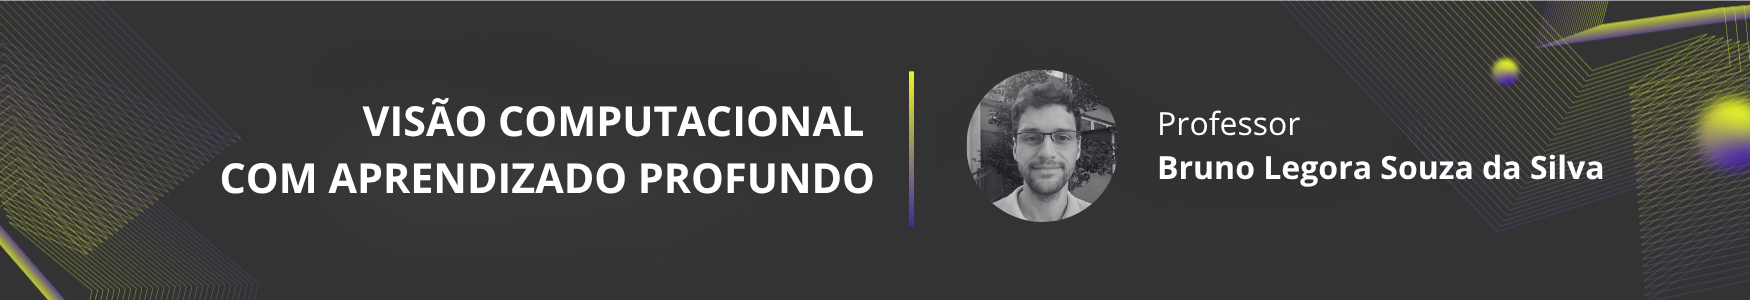

# Exercício Avaliativo nº 3

Esse exercício possui valor de 10 pontos na disciplina. Vocês irão encontrar 3 questões, façam elas nos campos de código indicados, sem remover nenhum campo de texto ou adicionar novos campos de código

### Introdução - Usando GPUs para treinar Redes Neurais

O longo tempo de treinamento de algumas redes neurais (como vocês viram no Laboratório 06) muitas vezes impedia o uso desse tipo de rede e

Porém, com o desenvolvimento das GPUs, foi possível paralelizar o treinamento nesses hardwares, o que acelerou (e muito) o desenvolvimento das inteligências artificiais.

Por sorte, o PyTorch já lida facilmente com dispositivos que possuem (ou não) GPUs dedicadas com a tecnologia CUDA (NVidia) ou ROCm (AMD). Neste exemplo, vamos lidar com GPUs com suporte a CUDA (o Colab já fornece uma GPU deste tipo para nós). Porém, para usarmos, é necessário ativar a opção de GPU.

Vá no menu "Ambiente de Execução" -> "Alterar tipo de ambiente de execução" e altere para o ambiente que usa GPUs. Aguarde reconectar. Ao fazer isso, poderemos acelerar nosso processamento ao configurar o PyTorch.


In [1]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Se a GPU estiver disponível, a variável device acima retornará o CUDA. Caso contrário, retornará CPU.

Partindo do pressuposto que ela está disponível (você configurou lá em cima), para treinar a rede neural, você deve "enviar" tanto o modelo quanto o conjunto de dados (características e alvos) para o device antes da etapa de treinamento. Isso é feito com o método .to(device):

```python
  model.to(device)
  data.to(device)
```

### Questão nº 01 (5 pts)

Nesta questão, você deve implementar um pipeline completo (desde o carregamento de dados até a classificação do conjunto de teste) com camadas convolucionais, treinando a rede neural usando CUDA. Use a base de dados do Laboratório 06. Se desejar, aproveite as arquiteturas listadas lá.

Porém, você deve desenhar gráficos de:
- Valor da função de perda x época
- Valor de acurácia no conjunto de teste x época

Exemplos desses gráficos podem ser encontrados [aqui](https://private-user-images.githubusercontent.com/118773869/372002294-dc9e3d07-c2ab-4fa8-9054-93b9e5db11e5.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDgwMzYyOTEsIm5iZiI6MTc0ODAzNTk5MSwicGF0aCI6Ii8xMTg3NzM4NjkvMzcyMDAyMjk0LWRjOWUzZDA3LWMyYWItNGZhOC05MDU0LTkzYjllNWRiMTFlNS5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjUwNTIzJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI1MDUyM1QyMTMzMTFaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT01MGEwOTFkNTcwMTk4OTY2ODdjNGMzOWRhNGI1MDEyMGFhYmI4NWY4OWEzZDQwNGRkNjU2MDYzYTU3MmJlZmZkJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCJ9.FoSbPo-NZnNg-nVuEsz48BIj1TYyRj19behA7uvPpVc) e [aqui](https://private-user-images.githubusercontent.com/118773869/372002385-6e0668b1-10b6-43ad-b5fe-c36aea6969bb.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDgwMzYyOTEsIm5iZiI6MTc0ODAzNTk5MSwicGF0aCI6Ii8xMTg3NzM4NjkvMzcyMDAyMzg1LTZlMDY2OGIxLTEwYjYtNDNhZC1iNWZlLWMzNmFlYTY5NjliYi5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjUwNTIzJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI1MDUyM1QyMTMzMTFaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT04MTJkNzA1OTNlYWQ4ZTJjZGFjYTk2NzZmZDBiZGU5ZTUwODNiOTY1NWE2OTgyMTY5YzdhYzU3M2M2OGE1Mjk0JlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCJ9.np9rhsS14qV9OiFePhLtrRunlI5JqeL7e0xw732Fypc).

O treinamento **deve** resultar em pelo menos 80% de acurácia. Usando GPUs, você conseguirá treinar mais arquiteturas (e/ou testar diferentes parâmetros) mais rapidamente!



Dispositivo: cuda
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Época 1: Perda média = 3.7306, Acurácia teste = 0.0250
Época 2: Perda média = 3.6797, Acurácia teste = 0.1000
Época 3: Perda média = 3.6411, Acurácia teste = 0.0583
Época 4: Perda média = 3.5214, Acurácia teste = 0.1500
Época 5: Perda média = 3.2376, Acurácia teste = 0.3250
Época 6: Perda média = 2.7100, Acurácia teste = 0.3833
Época 7: Perda média = 2.1247, Acurácia teste = 0.4667
Época 8: Perda média = 1.6316, Acurácia teste = 0.5917
Época 9: Perda média = 1.2309, Acurácia teste = 0.6167
Época 10: Perda média = 0.8937, Acurácia teste = 0.7500
Época 11: Perda média = 0.6413, Acurácia teste = 0.8000
Época 12: Perda média = 0.3660, Acurácia teste = 0.7917
Época 13: Perda média = 0.2512, Acurácia teste = 0.8417
Época 14: Perda média = 0.1864, Acurácia teste = 0.8750
Época 15: Perda média = 0.1295, Acurácia teste = 0.8833
Época 16: Perda média = 0.1044, Acurácia test

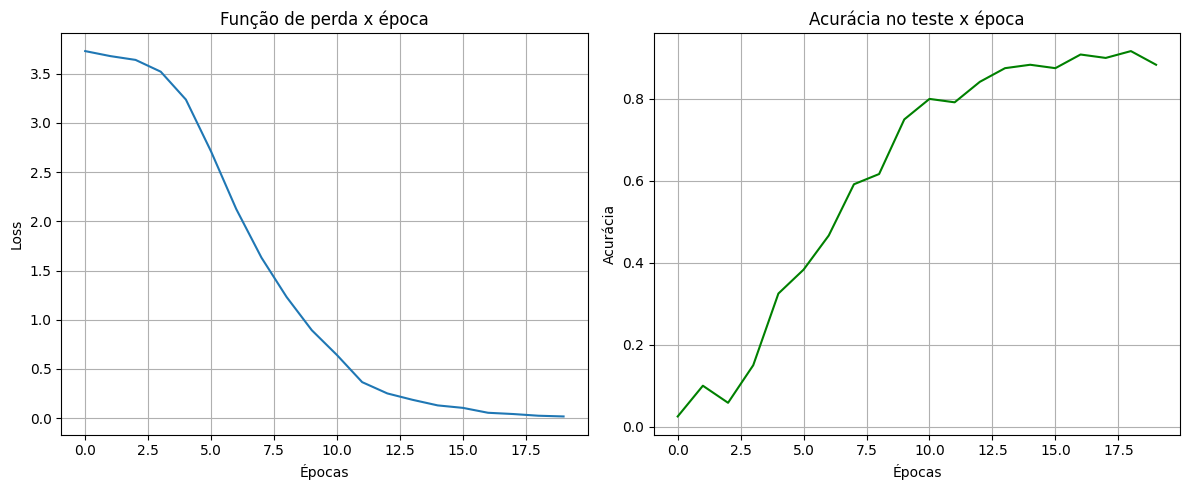

In [2]:
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
# from sklearn.preprocessing import LabelEncoder

# Verifica o device (não tenho placa da NVIDIA, então será CPU mesmo)
print("Dispositivo:", device)

# Carrega a base Olivetti Faces
faces = fetch_olivetti_faces()
images = faces.images  # (400, 64, 64)
targets = faces.target # (400,)

# Divide índices de treino e teste (como no Lab 06)
test_images_idx = [i for i in range(400) if i % 10 in [7, 8, 9]]
train_images_idx = [i for i in range(400) if i not in test_images_idx]

train_images = images[train_images_idx]
train_targets = targets[train_images_idx]
test_images = images[test_images_idx]
test_targets = targets[test_images_idx]

# Converte para tensores com shape [N, 1, 64, 64]
train_images = torch.tensor(train_images).unsqueeze(1).float()
test_images = torch.tensor(test_images).unsqueeze(1).float()

train_targets = torch.tensor(train_targets).long()
test_targets = torch.tensor(test_targets).long()

# Envia para o device
train_images = train_images.to(device)
train_targets = train_targets.to(device)
test_images = test_images.to(device)
test_targets = test_targets.to(device)

# Cria batches

## No lab 06, foi treinado tudo de uma vez, aqui vamos treinar em batches para poder "aprender melhor"
batch_size = 32
train_dataset = torch.utils.data.TensorDataset(train_images, train_targets)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_images, test_targets)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a CNN (sem função)
model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=3, padding=1),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d(2),

  torch.nn.Conv2d(16, 32, kernel_size=3, padding=1),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d(2),

  torch.nn.Flatten(),
  torch.nn.Linear(32 * 16 * 16, 128),
  torch.nn.ReLU(),
  torch.nn.Linear(128, 40)  # 40 pessoas
)

# Envia para GPU/CPU
model = model.to(device)

# Função de perda e otimizador
loss_fn = torch.nn.CrossEntropyLoss() ## No lab 06 é usado o MSELoss
optimizer = optim.Adam(model.parameters(), lr=0.001) # No lab 06 é usado o SGD ao invés do OPTIMIZER

# Treinamento
num_epochs = 20
losses = []
accuracies = []

for epoch in range(num_epochs):
  model.train()
  total_loss = 0

  for batch in train_loader:
    inputs, labels = batch
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  losses.append(total_loss / len(train_loader))

  # Avaliação
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for batch in test_loader:
      inputs, labels = batch
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      correct += (preds == labels).sum().item()
      total += labels.size(0)

  acc = correct / total
  accuracies.append(acc)
  print(f"Época {epoch+1}: Perda média = {losses[-1]:.4f}, Acurácia teste = {acc:.4f}")

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label="Perda")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Função de perda x época")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Acurácia", color="green")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.title("Acurácia no teste x época")
plt.grid()

plt.tight_layout()
plt.show()


### Questão nº 02 (2 pts)

Refaça a questão anterior, mas agora com a base de dados MNIST.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# 70000 imagens 28x28 de dígitos (0-9)
images = mnist.data.to_numpy().reshape((-1,28,28))
# o rótulo do dígito (0 a 9)
targets = mnist.target


Época 1: Perda média = 0.2011, Acurácia teste = 0.9745
Época 2: Perda média = 0.0570, Acurácia teste = 0.9844
Época 3: Perda média = 0.0387, Acurácia teste = 0.9887
Época 4: Perda média = 0.0296, Acurácia teste = 0.9889
Época 5: Perda média = 0.0229, Acurácia teste = 0.9909
Época 6: Perda média = 0.0185, Acurácia teste = 0.9900
Época 7: Perda média = 0.0152, Acurácia teste = 0.9896
Época 8: Perda média = 0.0125, Acurácia teste = 0.9894
Época 9: Perda média = 0.0099, Acurácia teste = 0.9908
Época 10: Perda média = 0.0096, Acurácia teste = 0.9902


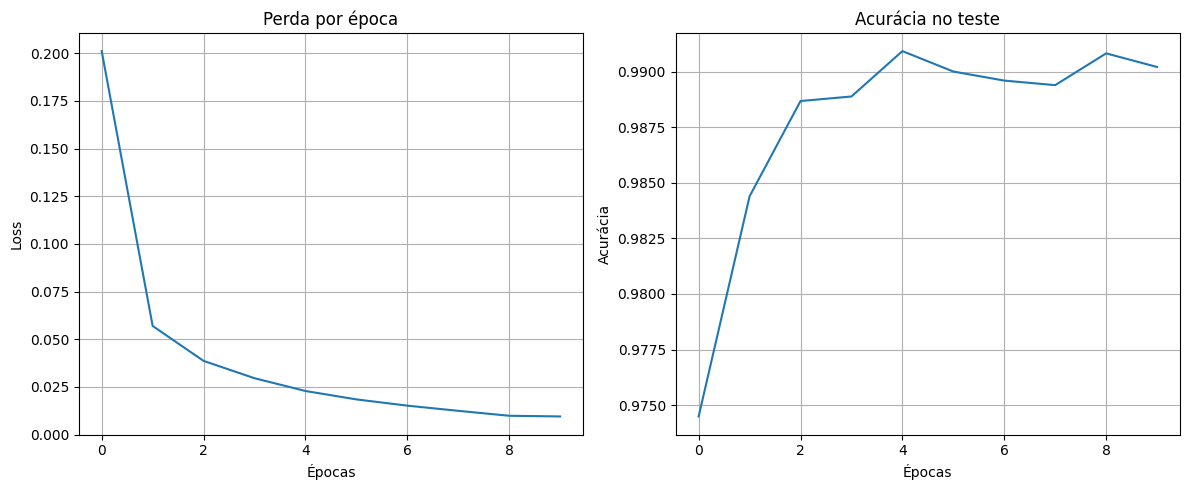

In [4]:
#Faça aqui!
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Carrega MNIST
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data.to_numpy().reshape(-1, 28, 28) / 255.0  # Normaliza (0 a 1)
targets = mnist.target.to_numpy().astype(np.int64)

# Divide em treino e teste
train_images, test_images, train_targets, test_targets = train_test_split(images, targets, test_size=0.14, random_state=42, stratify=targets)

# Converte para tensores [N, 1, 28, 28]
train_images = torch.tensor(train_images).unsqueeze(1).float()
test_images = torch.tensor(test_images).unsqueeze(1).float()
train_targets = torch.tensor(train_targets).long()
test_targets = torch.tensor(test_targets).long()

# Envia para o device
train_images = train_images.to(device)
test_images = test_images.to(device)
train_targets = train_targets.to(device)
test_targets = test_targets.to(device)

# Criação de DataLoaders
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_images, train_targets)
test_dataset = torch.utils.data.TensorDataset(test_images, test_targets)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Modelo CNN
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),  # 28x28 -> 14x14

    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),  # 14x14 -> 7x7

    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)  # 10 dígitos
)

model = model.to(device)

# Perda e otimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loop de treinamento
num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    losses.append(total_loss / len(train_loader))

    # Avaliação
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    accuracies.append(acc)
    print(f"Época {epoch+1}: Perda média = {losses[-1]:.4f}, Acurácia teste = {acc:.4f}")

# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Perda por época")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Acurácia no teste")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.grid()
plt.tight_layout()
plt.show()


### Questão nº 03 (3 pts)

Redes neurais convolucionais também são "boas" para lidar com dados com informações temporais. A convolução captura informações de vizinhança em imagens, e é capaz de fazer o mesmo em vetores com medições feitas ao longo do tempo. Essa não é uma tarefa de visão computacional, mas mostra uma possibilidade de uso de redes neurais convolucionais!

Um dos conjuntos de dados do United States National Renewable Energy Laboratory representa um índice de irradiância solar em 16 localizações distintas. Cada ponto representa uma medição desse valor, feita a cada 15 minutos.

**A tarefa, neste caso, é prever a irradiação solar em cada um dos pontos a cada 15 minutos, com base nas 2 medições anteriores. Para isso, você deve utilizar uma rede neural convolucional!**

Assim, na entrada você terá a medição atual e a de 15 minutos atrás, e você quer prever a medição de daqui 15 minutos.

O código abaixo pré-processa as séries temporais e as converte em uma matriz com várias amostras de 32 elementos (2 amostras por local), onde cada uma possui targets de tamanho 16 (1 amostra por local).

X possui 22165 linhas por 32 colunas, enquanto Y (alvo) possui a mesma quantidade de linhas e 16 colunas.

Cuidado! Não embaralhe esses dados. Eles estão organizados de forma com que, temporalmente, a segunda amostra ocorreu após a primeira e antes da terceira, e assim sucessivamente. Ao separar entre treino e teste, separe as N últimas amostras como teste sem embaralhar.

Utilize uma rede neural convolucional com camadas unidimensionais [torch.nn.Conv1d](https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv1d.html) para tentar prever esses valores.

Lembre-se, é um problema de regressão (previsão de valores, e não de classes), então sua função de perda não pode ser nada relacionada a métricas de classificação. E os dados, agora, não são 2-D!

Dica: Use o erro quadrático médio para calcular o erro entre a predição e o valor real. Use o [torch.nn.functional.mse_loss](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.mse_loss.html), que recebe dois tensores e retorna o erro quadrático médio entre elas.

Desenhe também um gráfico da evolução do erro quadrático médio ao longo das épocas, como feito nas questões 1 e 2.

Escolha algumas amostras e faça gráficos comparando o valor previsto com o valor real;




In [5]:
# Você pode ignorar essa célula, ela apenas carrega e pré-processa a base de dados.
# Faça a questão na próxima célula!
import pandas as pd
import datetime

def normalize(df):
    mindf = df.min()
    maxdf = df.max()
    return (df-mindf)/(maxdf-mindf)

def getRollingWindow(index):
    pivot = index
    train_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=20)
    train_end = pivot.strftime('%Y-%m-%d')

    pivot = pivot + datetime.timedelta(days=1)
    validation_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=6)
    validation_end = pivot.strftime('%Y-%m-%d')

    pivot = pivot + datetime.timedelta(days=1)
    test_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=6)
    test_end = pivot.strftime('%Y-%m-%d')

    return train_start, train_end, validation_start, validation_end, test_start, test_end

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

df = pd.read_csv('https://query.data.world/s/wo5wryokqyg5uvbfqqij2mucgwly5u',  parse_dates=['datetime'], index_col=0)
interval = ((df.index >= '2010-06') & (df.index < '2011-06'))
df = df.loc[interval]
df = normalize(df)

# Split data
interval = ((df.index >= '2010-06') & (df.index < '2011-06'))
df = df.loc[interval]

limit = df.index[-1].strftime('%Y-%m-%d')

test_end = ""
index = df.index[0]
batches = []
batches_supervised = []
_order = 2
_step = 1
nobs = _order * len(df.columns)
output_index = -len(df.columns)*_step

while test_end < limit:

    #print("Index: ", index.strftime('%Y-%m-%d'))

    train_start, train_end, validation_start, validation_end, test_start, test_end = getRollingWindow(index)
    index = index + datetime.timedelta(days=7)

    train = df[train_start : train_end]
    validation = df[validation_start : validation_end]
    test = df[test_start : test_end]
    train = pd.concat([train,validation],ignore_index=True)

    if len(batches) == 0:
        batches.append(train)
        train_reshaped_df = series_to_supervised(train,n_in=_order,n_out=_step)
        train_X, train_Y = train_reshaped_df.iloc[:, :nobs].values, train_reshaped_df.iloc[:, output_index:].values
        batches_supervised.append((train_X,train_Y))

    batches.append(test)
    test_reshaped_df = series_to_supervised(test,n_in=_order,n_out=_step)
    test_X, test_Y = test_reshaped_df.iloc[:, :nobs].values, test_reshaped_df.iloc[:, output_index:].values
    batches_supervised.append((test_X,test_Y))

x = []
y = []

for i in range(len(batches_supervised)):
  x.append(batches_supervised[i][0])
  y.append(batches_supervised[i][1])

x = np.concatenate(x)
y = np.concatenate(y)
x_train = x[:17732,:]
y_train = y[:17732,:]
x_test = x[17732:,:]
y_test = y[17732:,:]

Época 0: perda = 0.14475
Época 5: perda = 0.11921
Época 10: perda = 0.09554
Época 15: perda = 0.06941
Época 20: perda = 0.04261
Época 25: perda = 0.02323
Época 30: perda = 0.01795
Época 35: perda = 0.01573
Época 40: perda = 0.01196
Época 45: perda = 0.01121

MSE no teste: 0.01189


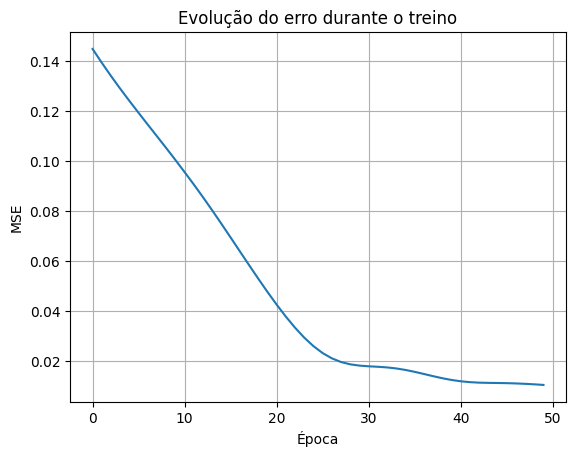

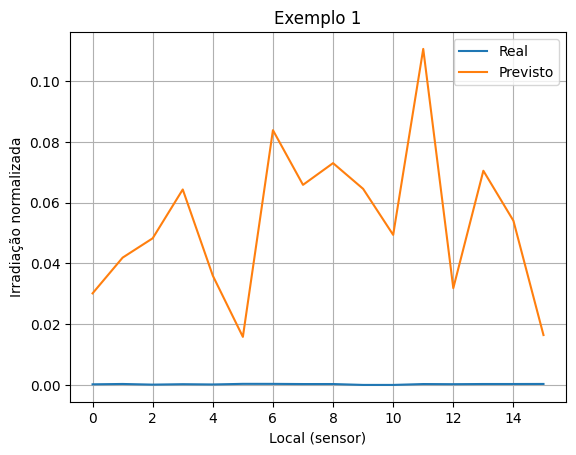

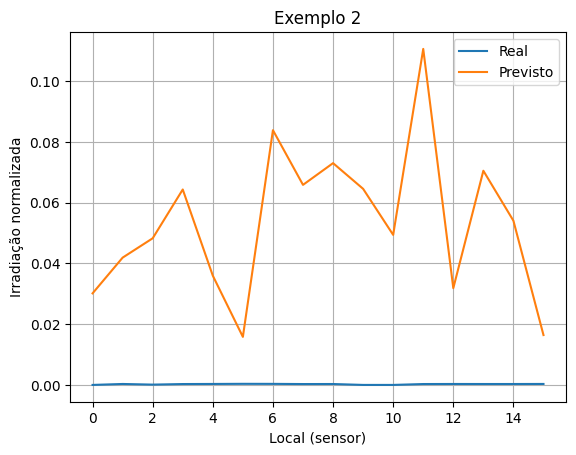

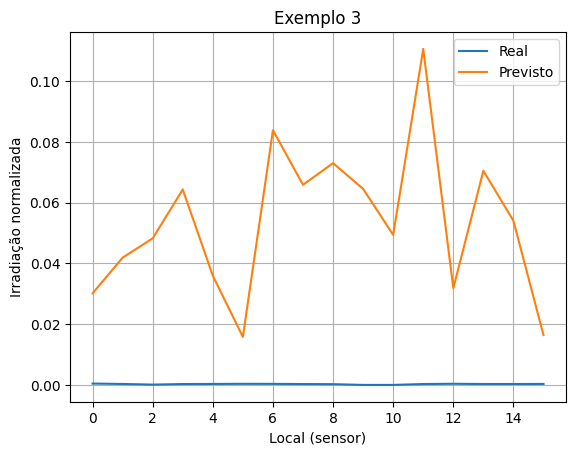

In [6]:
# Faça aqui
# Reorganiza os dados para o formato (batch, canais, tempo)
X_train_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 16, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 16, 2)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Instancia o modelo CNN sequencial
model = torch.nn.Sequential(
    torch.nn.Conv1d(in_channels=16, out_channels=32, kernel_size=2),  # (batch, 32, 1)
    torch.nn.ReLU(),
    torch.nn.Flatten(),  # (batch, 32)
    torch.nn.Linear(32, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 16)  # saída com 16 locais
)

# Otimizador e função de perda
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

# Treinamento
epochs = 50
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 5 == 0:
        print(f"Época {epoch}: perda = {loss.item():.5f}")

# Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_loss = loss_fn(y_test_pred, y_test_tensor)
    print(f"\nMSE no teste: {test_loss.item():.5f}")

# Gráfico da perda de treino
plt.plot(losses)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Evolução do erro durante o treino")
plt.grid()
plt.show()

# Exibir exemplos: valores reais vs previstos
for i in range(3):
    plt.figure()
    plt.plot(y_test_tensor[i].numpy(), label="Real")
    plt.plot(y_test_pred[i].numpy(), label="Previsto")
    plt.title(f"Exemplo {i+1}")
    plt.xlabel("Local (sensor)")
    plt.ylabel("Irradiação normalizada")
    plt.legend()
    plt.grid(True)
    plt.show()
